In [213]:
import numpy as np
import matplotlib.cm as cm
import random
from matplotlib import pyplot as plt

In [233]:
if __name__ == '__main__':

    class C_Means():
        def __init__(self, dataset, n_clusters=3, fuzzy_c=2, cut_param=.9):
            self.dataset = dataset
            # количество кластеров
            self.n_clusters = n_clusters
            # Параметр с
            self.fuzzy_c = fuzzy_c
            self.cut_param = cut_param
            # Количество итераций макс
            self.max_iter_num = 100
            self.tolerance = .01
            self.dist = np.zeros((self.dataset.shape[0], self.n_clusters))
            self.centroids = np.array(
            [[np.random.uniform(0, 640), np.random.uniform(0, 480)] for i in range(self.n_clusters)])
            self.u = np.array([[np.random.uniform(0, 1) for i in range(self.n_clusters)] 
            for j in range(self.dataset.shape[0])])
            self.labels = np.array([])
        def get_dist(self, list1, list2):
            return sum((i - j) ** 2 for i, j in zip(list1, list2))
        def distribute_data(self):
            self.dist = np.array([[self.get_dist(i, j) for i in self.centroids] for j in self.dataset])
            self.u = (1 / self.dist) ** (1 / (self.fuzzy_c - 1))
            self.normalize_arr()
            self.u = (self.u / self.u.sum(axis=1)[:, None])
        def normalize_arr(self):
            arr_with_inf = np.where(np.isinf(self.u))
            lines = arr_with_inf[0]
            rows = arr_with_inf[1]
            for i in range(0, len(lines)):
                self.u[lines[i]] = 0
                self.u[lines[i]][rows[i]] = 1
        def recalculate_centroids(self):
            self.centroids = (self.u.T).dot(self.dataset) / self.u.sum(axis=0)[:, None]
        def fit(self):
            iter = 1
            while iter < self.max_iter_num:
                prev_centroids = np.copy(self.centroids)
                self.recalculate_centroids()
                self.distribute_data()
                if max([self.get_dist(i, k) for i, k in zip(self.centroids, prev_centroids)]) < self.tolerance:
                    break
                iter += 1
        def cluster(self):
            labels = np.array([])
            for i in range(len(self.u)):
                # print(len(self.u))
                i_max = self.u[i][0]
                i_max_indx = 0
                for j in range(len(self.u[i])):
                    if (self.u[i][j] > i_max):
                        i_max = self.u[i][j]
                        i_max_indx = j
                if (i_max > self.cut_param):
                    labels = np.append(list(labels), i_max_indx + 1).astype(int)
                else:
                        labels = np.append(list(labels), 0).astype(int)
            return labels

In [234]:
n = 100
dataset = np.array([[np.random.uniform(0, n), np.random.uniform(0, n)] for k in range(n // 2)])
dataset

array([[ 4.93063104, 71.45020611],
       [ 8.73841296, 15.65311468],
       [ 3.3900622 , 25.54551307],
       [16.22167686, 59.34510601],
       [32.0257529 , 55.66833019],
       [39.32889428, 47.43571052],
       [11.14598085, 20.84989334],
       [73.39797896, 45.46688991],
       [35.66941957, 75.72478596],
       [60.53804006,  1.85001137],
       [73.5979833 , 90.67678384],
       [90.70748786, 74.612719  ],
       [22.36541816, 76.11585868],
       [92.86666686, 92.00305433],
       [42.13335214,  6.50696086],
       [72.57666082, 97.83896395],
       [78.61502152, 47.14727204],
       [37.99177552, 79.5822193 ],
       [19.75855477, 76.76090611],
       [72.25368815, 14.57275954],
       [12.29794033, 51.9463815 ],
       [52.24061054, 81.45894388],
       [75.35502837, 84.5206488 ],
       [26.73663304, 15.58161108],
       [96.75420727, 70.6910263 ],
       [ 5.61323493, 70.44256012],
       [96.90135714, 37.14392697],
       [42.54058333, 61.3554454 ],
       [13.14730606,

In [235]:
test = C_Means(dataset, 3, 2, .5)
test.fit()
pred = test.cluster()

In [236]:
x = np.arange(n)
ys = [i+x+(i*x)**2 for i in range(10)]
colors = cm.rainbow(np.linspace(0, 1, len(ys)))

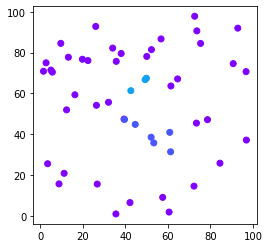

In [237]:
# scatter plots
plt.figure(figsize=(4, 4))
plt.scatter(dataset[:, 0], dataset[:, 1], color=colors[pred])
plt.show()